In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Version 1 Cleaned_GenZ_DatingApp_Data.csv")

In [6]:
sns.set_style("whitegrid")

In [8]:
df.groupby("Gender")["Primary_App"].value_counts(normalize=True).unstack() # Does gender influence dating app preferences?

Primary_App,bumble,hinge,none,okcupid,tinder
Gender,,,,,
female,0.267045,0.238636,0.045455,0.284091,0.164773
male,0.204678,0.216374,0.076023,0.298246,0.204678
non-binary,0.189542,0.313725,0.065359,0.254902,0.176471


In [ ]:
Question 1: Does gender influence dating app preferences?
Yes, there are noticeable differences in dating app preferences across genders:
Bumble: More popular among females (26.7%) compared to males (20.4%) and non-binary users (18.9%).
Hinge: Highest usage among non-binary individuals (31.3%), followed by females (23.8%) and males (21.6%).
Tinder: More evenly distributed but slightly more used by males (20.4%) than females (16.5%).
OkCupid: The most commonly used app across all genders.

In [9]:
multiple_apps_usage = df["Secondary_Apps"].notna().sum()  # Count non-null values in Secondary_Apps
total_users = len(df)
percentage_using_multiple_apps = (multiple_apps_usage / total_users) * 100

In [10]:
percentage_using_multiple_apps

100.0

In [ ]:
Are people using multiple dating apps simultaneously?

100% of users have at least one secondary dating app.
This suggests that multi-app usage is extremely common among Gen Z in India.

In [11]:
df.groupby("Age")["Usage_Frequency"].value_counts(normalize=True).unstack() # Which age group is most active on dating apps?

Usage_Frequency,daily,monthly,weekly
Age,,,
18,0.333333,0.298246,0.368421
19,0.343284,0.328358,0.328358
20,0.431373,0.294118,0.274510
21,0.262295,0.377049,0.360656
22,0.285714,0.396825,0.317460
23,0.383562,0.260274,0.356164
24,0.391892,0.243243,0.364865
25,0.481481,0.351852,0.166667


In [ ]:
Which age group is most active on dating apps?

The most active group (highest daily usage rate) is age 25 (48.1%), followed by age 20 (43.1%).
Younger users (18-19) have a more balanced distribution across daily, weekly, and monthly usage.
Ages 21-22 tend to use dating apps more on a monthly basis.

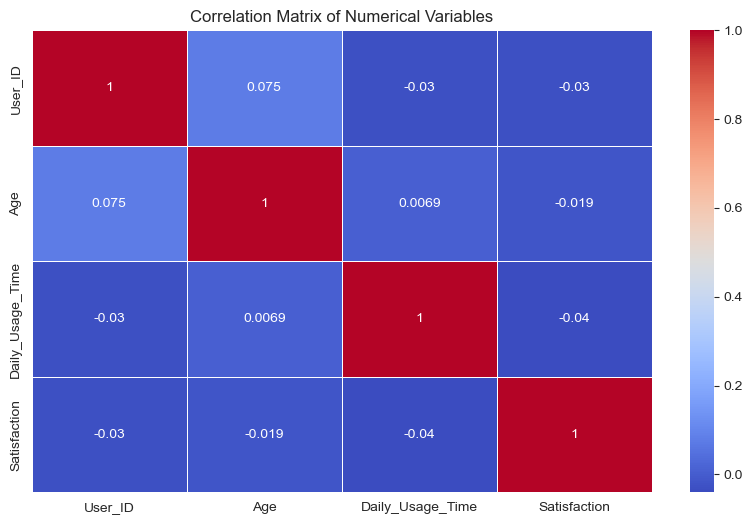

In [12]:
# Correlation Matrix & Heatmap
numerical_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [18]:
pivot_table = df.pivot_table(
    values='Daily_Usage_Time',
    index=['Gender', 'Location'],
    columns=pd.cut(df['Age'], bins=[18, 22, 26, 30, 35, 40]),
    aggfunc='mean',
    observed = False
)
pivot_table

Age                   (18, 22]  (22, 26]
Gender     Location                     
female     bangalore  1.611111  2.200000
           chennai    1.281250  1.500000
           delhi      1.888889  1.684211
           hyderabad  2.000000  1.833333
           kolkata    1.500000  2.100000
           mumbai     1.730769  1.500000
           pune       1.633333  1.681818
male       bangalore  1.558824  1.583333
           chennai    1.388889  1.500000
           delhi      1.611111  1.583333
           hyderabad  1.700000  1.833333
           kolkata    1.423077  1.909091
           mumbai     1.750000  1.642857
           pune       1.666667  1.666667
non-binary bangalore  1.550000  1.200000
           chennai    1.821429  1.500000
           delhi      1.285714  2.000000
           hyderabad  1.666667  2.055556
           kolkata    1.178571  1.166667
           mumbai     1.727273  1.416667
           pune       1.555556  1.812500

<Figure size 1000x500 with 0 Axes>

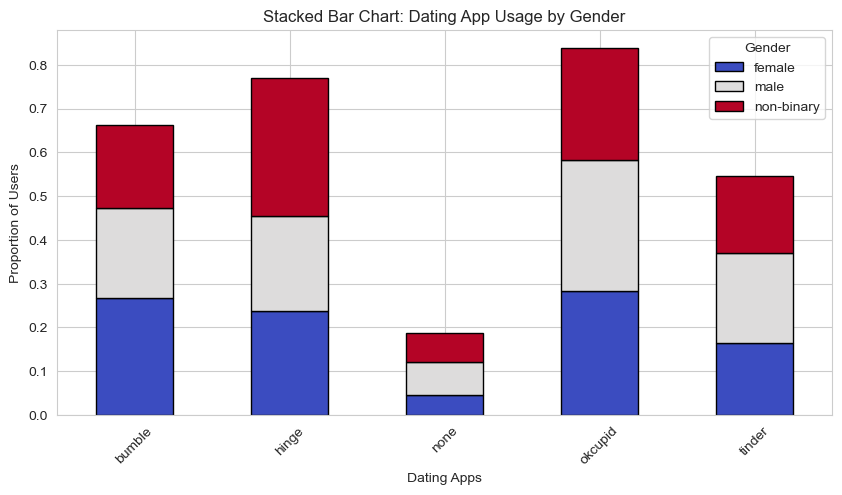

In [19]:
plt.figure(figsize=(10, 5))
gender_app_counts.T.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Stacked Bar Chart: Dating App Usage by Gender")
plt.ylabel("Proportion of Users")
plt.xlabel("Dating Apps")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()